<a href="https://colab.research.google.com/github/DiploDatos/AnalisisYCuracion/blob/master/Entregable_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 2


En el ejercicio 2 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad e imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.** que fue guardado en un archivo (Ejercicio 3 entregable 1). 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_context('talk')

In [ ]:
# Acá deberían leer el conjunto de datos que ya tienen.
from google.colab import drive
drive.mount('/content/drive/', force_remount=True )
import pandas as pd
#%cd /content/drive/My Drive/bases_mentoria/
path= '/content/drive/My Drive/merged_sales_df.csv'
df=pd.read_csv(path, encoding='latin-1', sep=",")

Mounted at /content/drive/


In [ ]:
df.head()

,Suburb,Rooms,Type,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,zipcode,airbnb_price_mean,airbnb_record_count,review_scores_value_mean,review_scores_location_mean
0,Abbotsford,2,h,1480000.0,2.5,3067.0,1.0,1.0,202.0,NaN,NaN,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,9.572115,9.697115
1,Abbotsford,2,h,1035000.0,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,9.572115,9.697115
2,Abbotsford,3,h,1465000.0,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,9.572115,9.697115
3,Abbotsford,3,h,850000.0,2.5,3067.0,2.0,1.0,94.0,NaN,NaN,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,9.572115,9.697115
4,Abbotsford,4,h,1600000.0,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,9.572115,9.697115


In [ ]:
df_aux=df

In [ ]:
df_aux.head()

,Suburb,Rooms,Type,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,zipcode,airbnb_price_mean,airbnb_record_count,review_scores_value_mean,review_scores_location_mean
0,Abbotsford,2,h,1480000.0,2.5,3067.0,1.0,1.0,202.0,NaN,NaN,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,9.572115,9.697115
1,Abbotsford,2,h,1035000.0,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,9.572115,9.697115
2,Abbotsford,3,h,1465000.0,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,9.572115,9.697115
3,Abbotsford,3,h,850000.0,2.5,3067.0,2.0,1.0,94.0,NaN,NaN,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,9.572115,9.697115
4,Abbotsford,4,h,1600000.0,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,9.572115,9.697115


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_aux['Type_encode']=labelencoder.fit_transform(df_aux['Type'])


In [ ]:
df_aux

,Suburb,Rooms,Type,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,zipcode,airbnb_price_mean,airbnb_record_count,review_scores_value_mean,review_scores_location_mean,Type_encode
0,Abbotsford,2,h,1480000.0,2.5,3067.0,1.0,1.0,202.0,NaN,NaN,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,9.572115,9.697115,0
1,Abbotsford,2,h,1035000.0,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,9.572115,9.697115,0
2,Abbotsford,3,h,1465000.0,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,9.572115,9.697115,0
3,Abbotsford,3,h,850000.0,2.5,3067.0,2.0,1.0,94.0,NaN,NaN,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,9.572115,9.697115,0
4,Abbotsford,4,h,1600000.0,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,9.572115,9.697115,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13439,Wheelers Hill,4,h,1245000.0,16.7,3150.0,2.0,2.0,652.0,NaN,1981.0,South-Eastern Metropolitan,7392.0,3150.0,124.026455,189.0,9.443609,9.466165,0
13440,Williamstown,3,h,1031000.0,6.8,3016.0,2.0,2.0,333.0,133.0,1995.0,Western Metropolitan,6380.0,3016.0,191.094595,74.0,9.586957,9.717391,0
13441,Williamstown,3,h,1170000.0,6.8,3016.0,2.0,4.0,436.0,NaN,1997.0,Western Metropolitan,6380.0,3016.0,191.094595,74.0,9.586957,9.717391,0
13442,Williamstown,4,h,2500000.0,6.8,3016.0,1.0,5.0,866.0,157.0,1920.0,Western Metropolitan,6380.0,3016.0,191.094595,74.0,9.586957,9.717391,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13444 entries, 0 to 13443
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Suburb                       13444 non-null  object 
 1   Rooms                        13444 non-null  int64  
 2   Type                         13444 non-null  object 
 3   Price                        13444 non-null  float64
 4   Distance                     13444 non-null  float64
 5   Postcode                     13444 non-null  float64
 6   Bathroom                     13444 non-null  float64
 7   Car                          13382 non-null  float64
 8   Landsize                     13444 non-null  float64
 9   BuildingArea                 7040 non-null   float64
 10  YearBuilt                    8112 non-null   float64
 11  Regionname                   13444 non-null  object 
 12  Propertycount                13444 non-null  float64
 13  zipcode         

In [ ]:
categorical_cols = ['Suburb','Type', 'Regionname']


In [ ]:
numerical_cols = ['Rooms', 'Price', 'Distance', 'Postcode', 'Car','Bathroom', 'Landsize', 'Propertycount', 'zipcode', 'airbnb_price_mean', 'airbnb_record_count', 'review_scores_value_mean', 'review_scores_location_mean']

## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


In [ ]:
cat_variables = df[['Type', 'Regionname']]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
cat_dummies.head()
# Ver que hacer con suburbios, tiene muchas cat#

,Type_t,Type_u,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0


In [ ]:
df = df.drop(['Suburb','Type', 'Regionname'], axis=1)
df = pd.concat([df, cat_dummies], axis=1)
df.head()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,...,Type_encode,Type_t,Type_u,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,1480000.0,2.5,3067.0,1.0,1.0,202.0,NaN,NaN,4019.0,...,0,0,0,0,1,0,0,0,0,0
1,2,1035000.0,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,4019.0,...,0,0,0,0,1,0,0,0,0,0
2,3,1465000.0,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,4019.0,...,0,0,0,0,1,0,0,0,0,0
3,3,850000.0,2.5,3067.0,2.0,1.0,94.0,NaN,NaN,4019.0,...,0,0,0,0,1,0,0,0,0,0
4,4,1600000.0,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,4019.0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
df.shape

(13444, 25)

## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [ ]:
# Estandarizamos previamente las variables#
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2 = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df2.head()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,...,Type_encode,Type_t,Type_u,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,0.111111,0.429231,0.051975,0.068577,0.125,0.1,0.000466,NaN,NaN,0.17616,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.111111,0.292308,0.051975,0.068577,0.125,0.0,0.000360,0.001775,0.856448,0.17616,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.222222,0.424615,0.051975,0.068577,0.250,0.0,0.000309,0.003370,0.856448,0.17616,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.222222,0.235385,0.051975,0.068577,0.250,0.1,0.000217,NaN,NaN,0.17616,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.333333,0.466154,0.051975,0.068577,0.125,0.2,0.000277,0.003190,0.995134,0.17616,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

melb_data_mice = df2.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor(5))
melb_data_mice[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(melb_data_mice[['YearBuilt', 'BuildingArea']])

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



In [ ]:
melb_data_mice.YearBuilt.describe()

count    13444.000000
mean         0.946634
std          0.038152
min          0.000000
25%          0.929440
50%          0.965450
75%          0.965450
max          1.000000
Name: YearBuilt, dtype: float64

In [ ]:
melb_data_mice.BuildingArea.describe()

count    13444.000000
mean         0.003610
std          0.008856
min          0.000000
25%          0.002606
50%          0.003981
75%          0.003981
max          1.000000
Name: BuildingArea, dtype: float64

In [ ]:
melb_data_mice.head()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,...,Type_encode,Type_t,Type_u,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,0.111111,0.429231,0.051975,0.068577,0.125,0.1,0.000466,0.003981,0.965450,0.17616,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.111111,0.292308,0.051975,0.068577,0.125,0.0,0.000360,0.001775,0.856448,0.17616,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.222222,0.424615,0.051975,0.068577,0.250,0.0,0.000309,0.003370,0.856448,0.17616,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.222222,0.235385,0.051975,0.068577,0.250,0.1,0.000217,0.003981,0.965450,0.17616,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.333333,0.466154,0.051975,0.068577,0.125,0.2,0.000277,0.003190,0.995134,0.17616,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


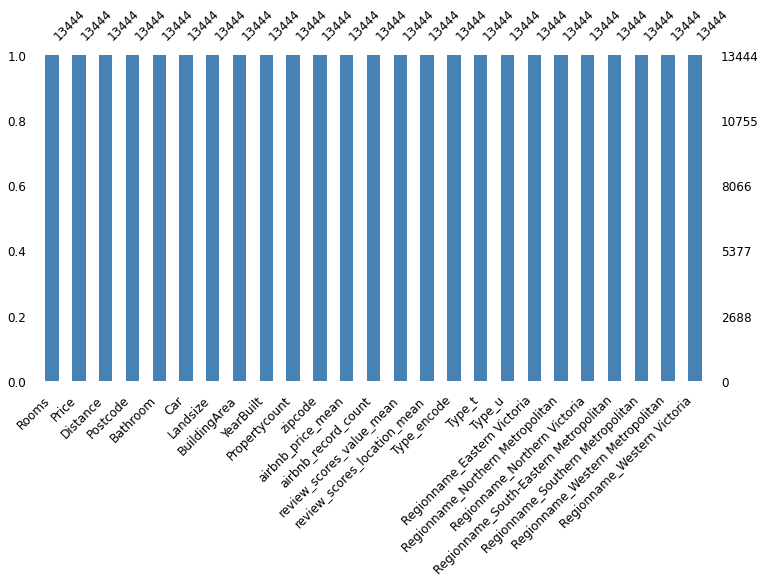

In [ ]:
## Imputamos el valor mas frecuente al resto de variables con missing
# imputing with amost_frequent
import missingno as msno
from sklearn.impute import SimpleImputer

#setting strategy to 'most_frequent' 

mean_imputer = SimpleImputer(strategy='most_frequent') # strategy can also be mean or median or most_frequent

melb_data_mice.iloc[:,:] = mean_imputer.fit_transform(melb_data_mice)
msno.bar(melb_data_mice,figsize=(12, 6), fontsize=12, color='steelblue')

In [ ]:
melb_data_mice.head()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,...,Type_encode,Type_t,Type_u,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,0.111111,0.429231,0.051975,0.068577,0.125,0.1,0.000466,0.003981,0.965450,0.17616,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.111111,0.292308,0.051975,0.068577,0.125,0.0,0.000360,0.001775,0.856448,0.17616,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.222222,0.424615,0.051975,0.068577,0.250,0.0,0.000309,0.003370,0.856448,0.17616,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.222222,0.235385,0.051975,0.068577,0.250,0.1,0.000217,0.003981,0.965450,0.17616,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.333333,0.466154,0.051975,0.068577,0.125,0.2,0.000277,0.003190,0.995134,0.17616,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


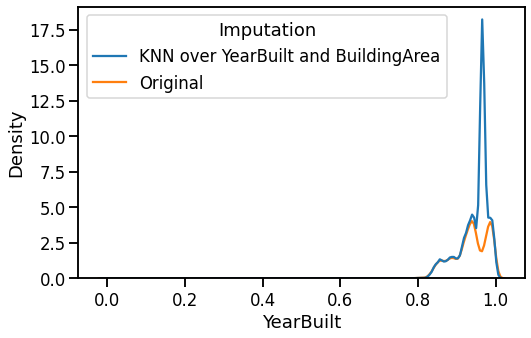

In [ ]:
mice_year_built = melb_data_mice.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt and BuildingArea'
melb_year_build = df2.YearBuilt.dropna().to_frame()
melb_year_build['Imputation'] = 'Original'
data = pd.concat([mice_year_built, melb_year_build])
data.reset_index(inplace=True)
fig = plt.figure(figsize=(8, 5))
g = sns.kdeplot(data=data, x='YearBuilt', hue='Imputation')

Ejemplo de gráfico comparando las distribuciones de datos obtenidas con cada método de imputación.

In [ ]:
# Preguntar porqué cambian tanto los picos de la variable imputada ante cambios en los vecinos cercanos?#
# Averiguar como es la distribucion de las variables a imputar previa imputacion (outliers??)#

In [ ]:
#VARIABLES QUE AUN TIENEN MISSING#
melb_data_mice.isna().any()[lambda x: x]

Series([], dtype: bool)

In [ ]:
# Paso a array (para el ejercicio 4)
melb_data_mice2= melb_data_mice.to_numpy()

In [ ]:
melb_data_mice2

array([[0.11111111, 0.42923077, 0.05197505, ..., 0.        , 0.        ,
        0.        ],
       [0.11111111, 0.29230769, 0.05197505, ..., 0.        , 0.        ,
        0.        ],
       [0.22222222, 0.42461538, 0.05197505, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.22222222, 0.33384615, 0.14137214, ..., 0.        , 1.        ,
        0.        ],
       [0.33333333, 0.74307692, 0.14137214, ..., 0.        , 1.        ,
        0.        ],
       [0.33333333, 0.36923077, 0.13097713, ..., 0.        , 1.        ,
        0.        ]])

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

In [ ]:

# Trabajamos con la matriz imputada y re escalada para aplicar PCA#
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(melb_data_mice)
print("Principal components")
print(pca.components_)
print("Explained variance: ")
print(pca.explained_variance_)
print("Explained variance ratio")
print(pca.explained_variance_ratio_)


Principal components
[[-7.84236434e-02 -4.68865059e-02 -4.42077264e-02  4.17535331e-02
  -2.08008935e-02 -3.52063975e-02 -2.12145686e-04 -6.13492999e-04
   6.72753031e-03  2.73128208e-02  4.20918544e-02  3.46750254e-02
   3.54330250e-02  1.06920624e-02  6.90180326e-02  5.69107724e-01
   8.20311320e-03  5.65006168e-01 -2.52914344e-03 -1.96760427e-01
  -2.73811285e-03 -2.27192927e-02  4.97330300e-01 -2.15900083e-01
  -2.14862341e-03]
 [-6.76230231e-02 -1.58686138e-01 -4.11935770e-02 -5.08602554e-02
  -4.30104055e-02 -3.53216670e-02 -6.57821651e-05 -7.43541558e-04
   7.36343625e-03  9.56833484e-02 -5.05975316e-02 -2.00082658e-02
   3.18423346e-02  5.94443678e-04 -2.17656096e-03  3.12791710e-01
  -8.78462467e-03  3.17184023e-01 -2.23882800e-03  6.80185619e-01
  -2.02070093e-03 -1.43840275e-02 -5.26464690e-01 -1.05442093e-01
  -1.41199033e-03]
 [-2.98889083e-02 -1.34731474e-01  1.29022903e-02 -6.57962612e-02
  -1.83251914e-02 -6.97136003e-03 -2.01119190e-04 -3.29638272e-04
   1.07616628e-02

In [ ]:
melb_data_mice

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,...,Type_encode,Type_t,Type_u,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,0.111111,0.429231,0.051975,0.068577,0.125,0.1,0.000466,0.003981,0.965450,0.176160,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.111111,0.292308,0.051975,0.068577,0.125,0.0,0.000360,0.001775,0.856448,0.176160,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.222222,0.424615,0.051975,0.068577,0.250,0.0,0.000309,0.003370,0.856448,0.176160,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.222222,0.235385,0.051975,0.068577,0.250,0.1,0.000217,0.003981,0.965450,0.176160,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.333333,0.466154,0.051975,0.068577,0.125,0.2,0.000277,0.003190,0.995134,0.176160,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13439,0.333333,0.356923,0.347193,0.153531,0.250,0.2,0.001506,0.003657,0.954988,0.333769,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13440,0.222222,0.291077,0.141372,0.016377,0.250,0.2,0.000769,0.002988,0.972019,0.286482,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13441,0.222222,0.333846,0.141372,0.016377,0.250,0.4,0.001007,0.005976,0.974453,0.286482,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13442,0.333333,0.743077,0.141372,0.016377,0.125,0.5,0.002000,0.003527,0.880779,0.286482,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


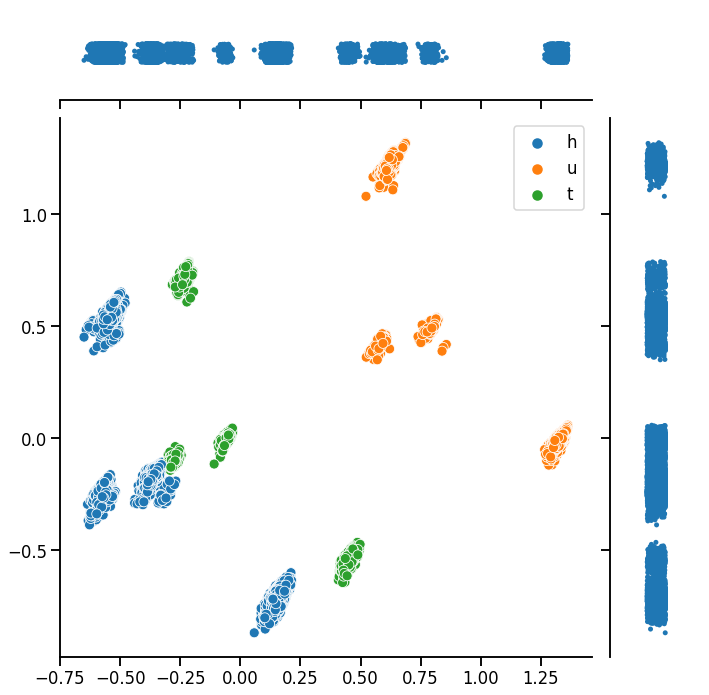

In [ ]:
import seaborn
X_reduced = pca.transform(melb_data_mice)

g = seaborn.JointGrid(x=X_reduced[:,0], y=X_reduced[:,1],
                      hue=df_aux.Type.values,
                      height=10)
g.plot_joint(seaborn.scatterplot, s=100)
g.plot_marginals(seaborn.stripplot)

In [ ]:
# En tres dimensiones para mostrar los primeros tres componentes principales#
import plotly.express as px
total_var = pca.explained_variance_ratio_.sum() * 100
fig = px.scatter_3d(
    X_reduced, x=0, y=1, z=2, color=df_aux['Type'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [ ]:
# Solo la tipología de construcción u parecería ser diferente#

In [ ]:
# En tres dimensiones para mostrar los primeros tres componentes principales#
import plotly.express as px
total_var = pca.explained_variance_ratio_.sum() * 100
fig = px.scatter_3d(
    X_reduced, x=0, y=1, z=2, color=df_aux['Regionname'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [ ]:
# Notar que la región Metropolitana Norte y la Oeste parecen ser diferentes del resto de regiones (dependiendo el componente con la que la observemos)

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [ ]:
#EXPORTAMOS LA BASE RESULTANTE#
melb_data_mice.to_csv("Entregable2_escalado.csv", index=None)
from google.colab import files
files.download('Entregable2_escalado.csv')


## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
